In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
file_one = "Files/1_county_level_confirmed_cases.csv"

In [259]:
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")
file_one_df.head()

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
0,2020-10-22 02:24:33 UTC,county,Alabama,Autauga,"Autauga, Alabama, US","1,001.00",32.54,-86.64,Medium metro,"55,200.00",2021,"3,661.23",30,54.35
1,2020-10-22 02:24:33 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US","1,003.00",30.73,-87.72,Small metro,"208,107.00",6443,"3,096.00",69,33.16
2,2020-10-22 02:24:33 UTC,county,Alabama,Barbour,"Barbour, Alabama, US","1,005.00",31.87,-85.39,Non-core,"25,782.00",996,"3,863.16",9,34.91
3,2020-10-22 02:24:33 UTC,county,Alabama,Bibb,"Bibb, Alabama, US","1,007.00",33.00,-87.13,Large fringe metro,"22,527.00",801,"3,555.73",14,62.15
4,2020-10-22 02:24:33 UTC,county,Alabama,Blount,"Blount, Alabama, US","1,009.00",33.98,-86.57,Large fringe metro,"57,645.00",1873,"3,249.20",25,43.37


In [315]:
confirmed = file_one_df.groupby(["state"]).sum()['confirmed']
confirmed

state
Alabama                 175674
Alaska                   11602
Arizona                 233912
Arkansas                101596
California              886939
Colorado                 88826
Connecticut              64871
Delaware                 23375
District of Columbia     16498
Florida                 760389
Georgia                 343897
Hawaii                   14233
Idaho                    55650
Illinois                358799
Indiana                 152396
Iowa                    109809
Kansas                   73485
Kentucky                 90996
Louisiana               177399
Maine                     6024
Maryland                137236
Massachusetts           146166
Michigan                167872
Minnesota               126591
Mississippi             112123
Missouri                163273
Montana                  24712
Nebraska                 60308
Nevada                   92064
New Hampshire             9917
New Jersey              223223
New Mexico               38715
Ne

In [182]:
df1 = pd.DataFrame(file_one_df, columns= ['state','county_name','total_population','confirmed', 'deaths'])#, index = 1["CO"])
df1.head()

,state,county_name,total_population,confirmed,deaths
0,Alabama,Autauga,"55,200.00",2021,30
1,Alabama,Baldwin,"208,107.00",6443,69
2,Alabama,Barbour,"25,782.00",996,9
3,Alabama,Bibb,"22,527.00",801,14
4,Alabama,Blount,"57,645.00",1873,25


In [183]:
# colorado_df = df1[df1['state'].str.match('Colorado')]
new_row = pd.DataFrame({'state':'', 'county_name':'', 'total_population':'', 
                        'confirmed':'', 'deaths':''}, index =[0])
new_row_df = pd.concat([new_row, df1[:]]).reset_index(drop = True) 
new_row_df.head()

,state,county_name,total_population,confirmed,deaths
0,,,,,
1,Alabama,Autauga,"55,200.00",2021,30
2,Alabama,Baldwin,"208,107.00",6443,69
3,Alabama,Barbour,"25,782.00",996,9
4,Alabama,Bibb,"22,527.00",801,14


In [184]:
colorado_df = new_row_df[new_row_df['state'].str.match('Colorado')]
colorado_df.head()

,state,county_name,total_population,confirmed,deaths
244,Colorado,Adams,"497,115.00",12408,249
245,Colorado,Alamosa,"16,444.00",292,9
246,Colorado,Arapahoe,"636,671.00",11529,377
247,Colorado,Archuleta,"12,908.00",61,0
248,Colorado,Baca,"3,563.00",25,0


In [288]:
#access file
file_ACCESS = "Files/Copy of FoodEnvironmentAtlas - ACCESS.csv"
file_ACCESS_df = pd.read_csv(file_ACCESS, encoding="ISO-8859-1")
pd.options.display.float_format = '{:,.2f}'.format

#output specific columns
df1 = pd.DataFrame(file_ACCESS_df, columns= ['State','County','LACCESS_POP15','LACCESS_LOWI15'])

#rename columns 
renamed_df = df1.rename(columns={"LACCESS_POP15": "Low Access to Store","LACCESS_LOWI15":"Low Income Low Access to Store"})

#only output CO
colorado_df1 = renamed_df[renamed_df['State'].str.match('CO')]

#get rid of state and county columns
lowi_colorado_df = pd.DataFrame(colorado_df1, columns= ["County", "Low Access to Store","Low Income Low Access to Store"])
lowi_colorado_df.head()
df1

,State,County,LACCESS_POP15,LACCESS_LOWI15
0,AL,Autauga,"17,496.69","6,543.68"
1,AL,Baldwin,"30,561.26","9,886.83"
2,AL,Barbour,"6,069.52","2,948.79"
3,AL,Bibb,969.38,596.16
4,AL,Blount,"3,724.43","1,650.96"
...,...,...,...,...
3138,WY,Sweetwater,"18,934.74","4,750.91"
3139,WY,Teton,"6,212.39","1,577.77"
3140,WY,Uinta,"4,686.02","2,054.18"
3141,WY,Washakie,931.41,309.03


In [194]:
#combine data frames and rename columns

comb_df = colorado_df.join(lowi_colorado_df, lsuffix="deaths", rsuffix="Low Income Low Access to Store")
comb_df1 = comb_df.drop(index=[3198,3212], columns="County")
renamed_df2 = comb_df1.rename(columns={"state": "State","county_name":"County","total_population":"Total Pop.","confirmed":"Confirmed","deaths":"Deaths"})
renamed_df2.head()

,State,County,Total Pop.,Confirmed,Deaths,Low Access to Store,Low Income Low Access to Store
244,Colorado,Adams,"497,115.00",12408,249,"66,895.71","24,845.52"
245,Colorado,Alamosa,"16,444.00",292,9,915.19,405.35
246,Colorado,Arapahoe,"636,671.00",11529,377,"69,481.67","13,732.22"
247,Colorado,Archuleta,"12,908.00",61,0,"3,600.90","1,289.72"
248,Colorado,Baca,"3,563.00",25,0,955.22,318.13


In [324]:
low_access_store = df1.groupby(["State"]).sum()["LACCESS_POP15"]

confirmed_df = pd.DataFrame({"confirmed":confirmed})
new_confirmed_df = confirmed_df.drop(index="Puerto Rico")
new_confirmed_df = confirmed_df.reset_index()
low_df = pd.DataFrame({"low access":low_access_store})

low_df = low_df.rename({"AK":"Alaska","AL":"Alabama","AR":"Arkansas","AZ":"Arizona","CA":"California","CO":"Colorado","CT":"Connecticut","DC":"District of Columbia","IA":"Iowa","MS":"Mississippi","NV":"Nevada","NC":"North Carolina","ND":"North Dakota","NH":"New Hampshire","NY":"New York","NM":"New Mexico","NJ":"New Jersey","RI":"Rhode Island"})
low_df = low_df.sort_values(by = ["State"])

low_df = low_df.reset_index()
comb_d1f = confirmed_df.join(low_df, lsuffix="confirmed", rsuffix="low access")

comb_d1f#.sort_values(by = ["State"])
new_confirmed_df
confirmed_df

,confirmed
state,
Alabama,175674
Alaska,11602
Arizona,233912
Arkansas,101596
California,886939
Colorado,88826
Connecticut,64871
Delaware,23375
District of Columbia,16498


In [327]:
new_confirmed_df = confirmed_df.drop(index="Puerto Rico")
new_confirmed_df

,confirmed
state,
Alabama,175674
Alaska,11602
Arizona,233912
Arkansas,101596
California,886939
Colorado,88826
Connecticut,64871
Delaware,23375
District of Columbia,16498


In [303]:
#access file
file_STORES = "Files/Copy of FoodEnvironmentAtlas - STORES.csv"
file_STORES_df = pd.read_csv(file_STORES, encoding="ISO-8859-1")
pd.options.display.float_format = '{:,.2f}'.format

#output specific columns
df1_STORES = pd.DataFrame(file_STORES_df, columns= ['State','County','GROC16','CONVS16'])

#rename columns 
renamed_df_STORES = df1_STORES.rename(columns={"GROC16": "# of Grocery Stores","CONVS16":"# of Convenient Stores"})

#only output CO
colorado_df1_STORES = renamed_df_STORES[renamed_df_STORES['State'].str.match('CO')]

#get rid of state and county columns
colorado_df2_STORES = pd.DataFrame(colorado_df1_STORES, columns= ["County", '# of Grocery Stores'])
colorado_df2_STORES["% Grocery Stores"]=""
colorado_df2_STORES.head()

,County,# of Grocery Stores,% Grocery Stores
244,Adams,63,
245,Alamosa,4,
246,Arapahoe,95,
247,Archuleta,3,
248,Baca,1,


In [196]:
#access file
file_STORES = "Files/Copy of FoodEnvironmentAtlas - STORES.csv"
file_STORES_df = pd.read_csv(file_STORES, encoding="ISO-8859-1")
pd.options.display.float_format = '{:,.2f}'.format

#output specific columns
df1_STORES = pd.DataFrame(file_STORES_df, columns= ['State','County','GROC16','CONVS16'])

#rename columns 
renamed_df_STORES = df1_STORES.rename(columns={"GROC16": "# of Grocery Stores","CONVS16":"# of Convenient Stores"})

#only output CO
colorado_df1_STORES = renamed_df_STORES[renamed_df_STORES['State'].str.match('CO')]

#get rid of state and county columns
colorado_df2_STORES2 = pd.DataFrame(colorado_df1_STORES, columns= ["County", '# of Convenient Stores'])
colorado_df2_STORES2["% Convenient Stores"]=""
colorado_df2_STORES3 = colorado_df2_STORES2.drop(columns=['County'])
colorado_df2_STORES3.head()

,# of Convenient Stores,% Convenient Stores
244,125,
245,7,
246,158,
247,6,
248,3,


In [214]:
comb_STORES_df = colorado_df2_STORES.join(colorado_df2_STORES3, lsuffix="% Grocery Stores")
comb_STORES_df["% Grocery Stores"]=comb_STORES_df['# of Grocery Stores']/(comb_STORES_df['# of Grocery Stores'] + comb_STORES_df['# of Convenient Stores'])
comb_STORES_df["% Convenient Stores"]=comb_STORES_df['# of Convenient Stores']/(comb_STORES_df['# of Grocery Stores'] + comb_STORES_df['# of Convenient Stores'])
comb_STORES_df1 = comb_STORES_df.drop(columns=['County'])
comb_STORES_df1.head()

,# of Grocery Stores,% Grocery Stores,# of Convenient Stores,% Convenient Stores
244,63,0.34,125,0.66
245,4,0.36,7,0.64
246,95,0.38,158,0.62
247,3,0.33,6,0.67
248,1,0.25,3,0.75


In [215]:
#MERGE
comb_df2 = renamed_df2.join(comb_STORES_df1, lsuffix="Low Income Low Access to Store", rsuffix="# of Grocery Stores")
comb_df2.head()

,State,County,Total Pop.,Confirmed,Deaths,Low Access to Store,Low Income Low Access to Store,# of Grocery Stores,% Grocery Stores,# of Convenient Stores,% Convenient Stores
244,Colorado,Adams,"497,115.00",12408,249,"66,895.71","24,845.52",63,0.34,125,0.66
245,Colorado,Alamosa,"16,444.00",292,9,915.19,405.35,4,0.36,7,0.64
246,Colorado,Arapahoe,"636,671.00",11529,377,"69,481.67","13,732.22",95,0.38,158,0.62
247,Colorado,Archuleta,"12,908.00",61,0,"3,600.90","1,289.72",3,0.33,6,0.67
248,Colorado,Baca,"3,563.00",25,0,955.22,318.13,1,0.25,3,0.75


In [216]:
#access file
file_HEALTH = "Files/Copy of FoodEnvironmentAtlas - HEALTH.csv"
file_HEALTH_df = pd.read_csv(file_HEALTH, encoding="ISO-8859-1")
pd.options.display.float_format = '{:,.2f}'.format

#output specific columns
df1_HEALTH = pd.DataFrame(file_HEALTH_df, columns= ['State','County','PCT_OBESE_ADULTS17'])

#rename columns 
renamed_df_HEALTH = df1_HEALTH.rename(columns={"PCT_OBESE_ADULTS17": "% of Obese Adults"})

#only output CO
colorado_df1_HEALTH = renamed_df_HEALTH[renamed_df_HEALTH['State'].str.match('CO')]
# colorado_df1_STORES

#get rid of state and county columns
colorado_df2_HEALTH = pd.DataFrame(colorado_df1_HEALTH, columns= ["County", "% of Obese Adults"])
colorado_df2_HEALTH2 = colorado_df2_HEALTH.drop(columns=['County'])
colorado_df2_HEALTH2.head()

,% of Obese Adults
244,22.60
245,22.60
246,22.60
247,22.60
248,22.60


In [270]:
comb_df3 = comb_df2.join(colorado_df2_HEALTH2, lsuffix="SPECS16", rsuffix="% of Obese Adults")
comb_df3#.head()

,State,County,Total Pop.,Confirmed,Deaths,Low Access to Store,Low Income Low Access to Store,# of Grocery Stores,% Grocery Stores,# of Convenient Stores,% Convenient Stores,% of Obese Adults
244,Colorado,Adams,"497,115.00",12408,249,"66,895.71","24,845.52",63,0.34,125,0.66,22.60
245,Colorado,Alamosa,"16,444.00",292,9,915.19,405.35,4,0.36,7,0.64,22.60
246,Colorado,Arapahoe,"636,671.00",11529,377,"69,481.67","13,732.22",95,0.38,158,0.62,22.60
247,Colorado,Archuleta,"12,908.00",61,0,"3,600.90","1,289.72",3,0.33,6,0.67,22.60
248,Colorado,Baca,"3,563.00",25,0,955.22,318.13,1,0.25,3,0.75,22.60
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Colorado,Summit,"30,429.00",604,4,"5,174.80","1,834.15",10,0.43,13,0.57,22.60
304,Colorado,Teller,"24,113.00",200,4,"3,003.70",415.56,4,0.27,11,0.73,22.60
305,Colorado,Washington,"4,840.00",82,0,"2,485.03",786.43,1,0.25,3,0.75,22.60
306,Colorado,Weld,"295,123.00",5563,158,"37,098.74","12,384.24",32,0.29,77,0.71,22.60


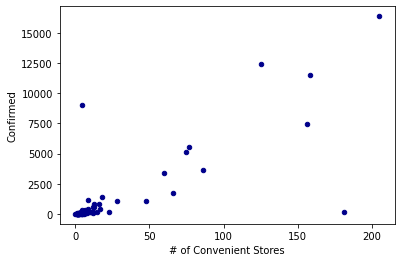

In [275]:
ax1 = comb_df3.plot.scatter(x='# of Convenient Stores',
                      y='Confirmed',
                      c='DarkBlue')

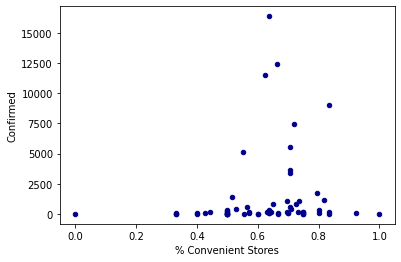

In [231]:
ax2 = comb_df3.plot.scatter(x='% Convenient Stores',
                        y='Confirmed',
                        c='DarkBlue')

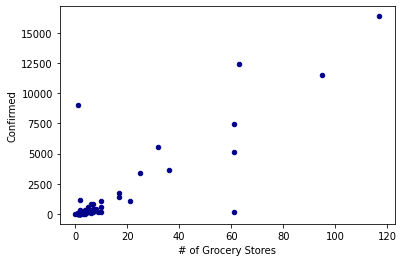

In [274]:
ax3 = comb_df3.plot.scatter(x='# of Grocery Stores',
                        y='Confirmed',
                        c='DarkBlue')

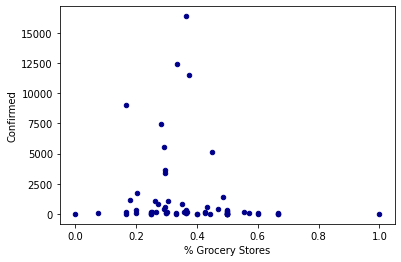

In [273]:
ax4 = comb_df3.plot.scatter(x='% Grocery Stores',
                        y='Confirmed',
                        c='DarkBlue')

In [280]:
state_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/08-01-2020.csv')
# state_df_drops = state_df.drop(index=[2,9,10,13,14,39,44,52], columns=["Province_State","Country_Region","Last_Update","Lat","Long_","Recovered","Active","FIPS","Incident_Rate","People_Tested","People_Hospitalized","Mortality_Rate","UID","ISO3","Testing_Rate","Hospitalization_Rate"])
state_df_drops = state_df.drop(index=[2,9,10,13,14,39,44,52], columns=["Country_Region","Last_Update","Lat","Long_","Recovered","Active","FIPS","Incident_Rate","People_Tested","People_Hospitalized","Mortality_Rate","UID","ISO3","Testing_Rate","Hospitalization_Rate"])
state_df_drops

,Province_State,Confirmed,Deaths
0,Alabama,89349,1603
1,Alaska,3136,24
3,Arizona,177002,3747
4,Arkansas,43173,458
5,California,506613,9345
6,Colorado,47249,1844
7,Connecticut,49810,4432
8,Delaware,14877,585
11,Florida,480028,7022
12,Georgia,190012,3825
